# Evaluation Phase II Modell M2

In [1]:
import arrow
import numpy as np
import os
import glob
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
%run -i ./scripts/setConfigs.py

Set configs..


In [3]:
from matplotlib import rc
rc('text', usetex=True)

In [5]:
os.chdir(os.path.join(exp_data_path, 'experiment', 'fine_tuning'))
extension = 'csv'
result = glob.glob('*.{}'.format(extension))

In [6]:
result_fns = []

for res in result:
    if 'tVPII' in res:
        result_fns.append(res)

In [7]:
len(result_fns)

37

In [8]:
df_experiments = pd.read_csv(result_fns[0], sep=';')

In [9]:
df_experiments.head()

,optimizer,fine_tune_classes,name_pretrained_model,k,fine_tune_iterations,lr,model_fn,pretrained_model_fn,logreg_fn,TP_x_test,TN_x_test,FP_x_test,FN_x_test,TP_x_drifted_ano,TN_x_drifted_ano,FP_x_drifted_ano,FN_x_drifted_ano,Accuracy_x_test,Precision_x_test,Specifity_x_test,Sensitivity_x_test,Accuracy_x_drifted_ano,Precision_x_drifted_ano,Specifity_x_drifted_ano,Sensitivity_x_drifted_ano
0,Adam,"[2, 3]",M2,5,1,0.1,/home/torge/dev/masterthesis_code/02_Experimen...,20200303_LogRegModell.save,/home/torge/dev/masterthesis_code/02_Experimen...,2496,4831,27712,1,2494,4339,28204,3,20.910388,8.262712,65.934216,99.959952,19.500571,8.124308,63.500659,99.879856


In [10]:
for file in result_fns[1:]:
    df = pd.read_csv(file, sep=';')
    df_experiments = df_experiments.append(df)

In [11]:
len(df_experiments)

37

In [12]:
os.chdir('..')
os.chdir('..')
os.chdir('..')
print(os.getcwd())

/home/torge/dev/masterthesis_code/02_Experimente/03_Experimente/exp_data


In [14]:
df_experiments.head()

,optimizer,fine_tune_classes,name_pretrained_model,k,fine_tune_iterations,lr,model_fn,pretrained_model_fn,logreg_fn,TP_x_test,TN_x_test,FP_x_test,FN_x_test,TP_x_drifted_ano,TN_x_drifted_ano,FP_x_drifted_ano,FN_x_drifted_ano,Accuracy_x_test,Precision_x_test,Specifity_x_test,Sensitivity_x_test,Accuracy_x_drifted_ano,Precision_x_drifted_ano,Specifity_x_drifted_ano,Sensitivity_x_drifted_ano
0,Adam,"[2, 3]",M2,5,1,0.10,/home/torge/dev/masterthesis_code/02_Experimen...,20200303_LogRegModell.save,/home/torge/dev/masterthesis_code/02_Experimen...,2496,4831,27712,1,2494,4339,28204,3,20.910388,8.262712,65.934216,99.959952,19.500571,8.124308,63.500659,99.879856
0,SGD,[1],M2,5,1,0.01,/home/torge/dev/masterthesis_code/02_Experimen...,20200303_LogRegModell.save,/home/torge/dev/masterthesis_code/02_Experimen...,2486,7984,24559,11,2490,7042,25501,7,29.880137,9.192087,76.255969,99.559471,27.203196,8.895716,73.877465,99.719664
0,Adam,[1],M2,10,64,0.10,/home/torge/dev/masterthesis_code/02_Experimen...,20200303_LogRegModell.save,/home/torge/dev/masterthesis_code/02_Experimen...,2494,1005,31538,3,2497,962,31581,0,9.985731,7.328397,28.722492,99.879856,9.871575,7.327308,27.811506,100.000000
0,SGD,"[1, 3]",M2,5,1,0.10,/home/torge/dev/masterthesis_code/02_Experimen...,20200303_LogRegModell.save,/home/torge/dev/masterthesis_code/02_Experimen...,2400,32543,0,97,2394,29230,3313,103,99.723174,100.000000,93.131672,96.115338,90.251142,41.948484,92.429800,95.875050
0,Adam,[2],M2,20,64,0.10,/home/torge/dev/masterthesis_code/02_Experimen...,20200303_LogRegModell.save,/home/torge/dev/masterthesis_code/02_Experimen...,2485,15295,17248,12,2485,13652,18891,12,50.742009,12.593118,86.023622,99.519423,46.053082,11.625187,84.600607,99.519423


In [15]:
result_cols_x_test = ['Accuracy_x_test', 'Precision_x_test', 'Specifity_x_test', 'Sensitivity_x_test']
result_cols_x_drifted_ano = ['Accuracy_x_drifted_ano', 'Precision_x_drifted_ano', 'Specifity_x_drifted_ano', 'Sensitivity_x_drifted_ano']

In [16]:
df_res_x_test = df_experiments[result_cols_x_test]
df_res_x_drifted_ano = df_experiments[result_cols_x_drifted_ano]

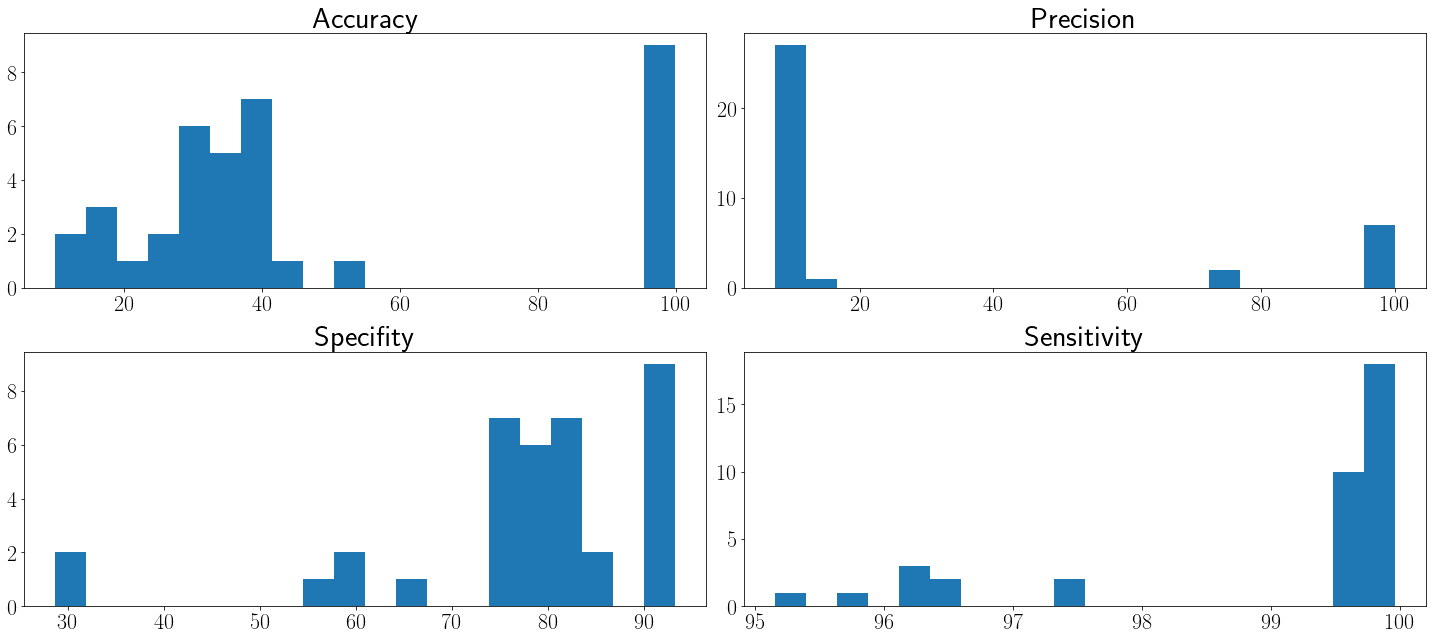

In [20]:
fig, ax= plt.subplots(2,2, figsize=(20,10))

#df_res_x_test['Accuracy_x_test'].value_counts().sort_index().plot.bar(ax=ax[0][0])
ax[0][0].hist(df_res_x_test['Accuracy_x_test'], bins=20)
ax[0][0].set_title('Accuracy',fontsize=30)
ax[0][0].tick_params(axis='both', which='major', labelsize=22)

ax[0][1].hist(df_res_x_test['Precision_x_test'], bins=20)
ax[0][1].set_title('Precision',fontsize=30)
ax[0][1].tick_params(axis='both', which='major', labelsize=22)

ax[1][0].hist(df_res_x_test['Specifity_x_test'], bins=20)
ax[1][0].set_title('Specifity',fontsize=30)
ax[1][0].tick_params(axis='both', which='major', labelsize=22)

ax[1][1].hist(df_res_x_test['Sensitivity_x_test'], bins=20)
ax[1][1].set_title('Sensitivity',fontsize=30)
ax[1][1].tick_params(axis='both', which='major', labelsize=22)

#fig.suptitle('Histogramme der Kennzahlen der Modelle des Versuchsplans $\displaystyle tVP^{I}_{M_1}$ auf  $X_{test}$', fontsize=30)

fig.tight_layout(rect=[0, 0.03, 1, 0.93])

save = True
if save:
    fn = os.path.join(os.getcwd(), 'figs', '{}_results_tvp_2_m2_hists_x_test.pdf'.format(arrow.now().format('YYYYMMDD')))
    fig.savefig(fn, bbox_inches='tight', pad_inches=0)

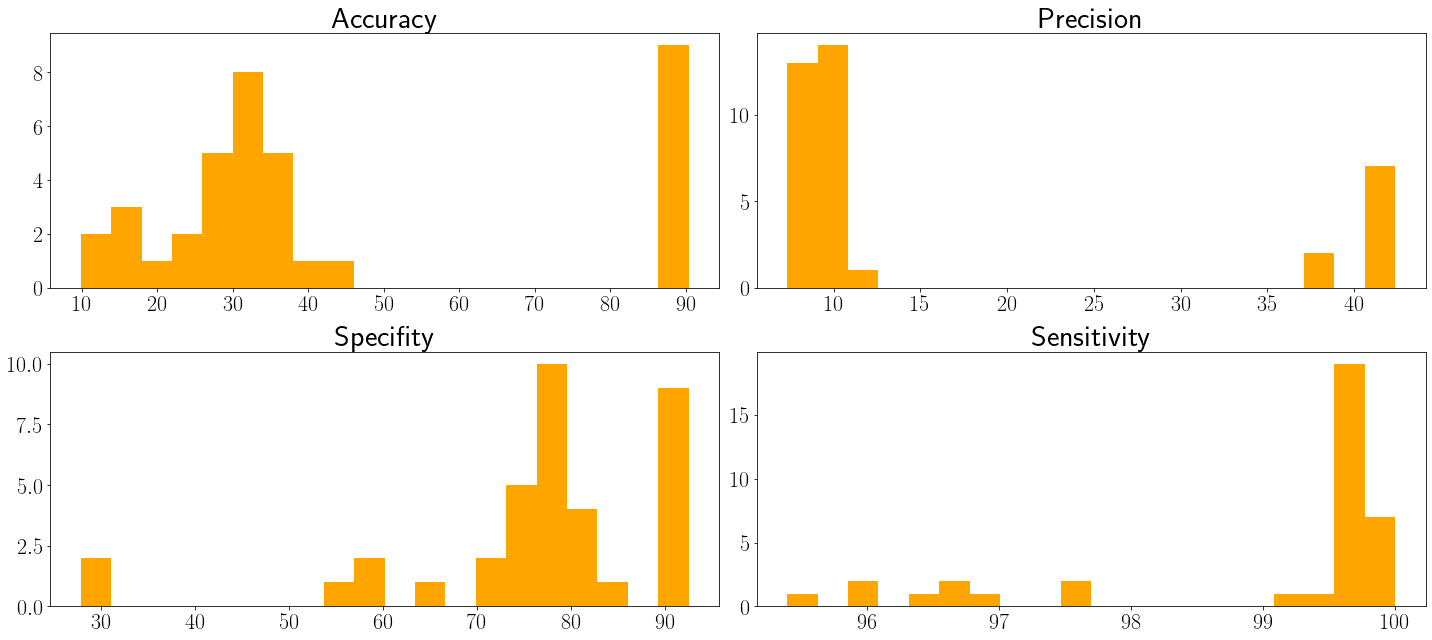

In [19]:
fig, ax= plt.subplots(2,2, figsize=(20,10))

ax[0][0].hist(df_res_x_drifted_ano['Accuracy_x_drifted_ano'], bins=20, color='orange')
ax[0][0].set_title('Accuracy',fontsize=30)
ax[0][0].tick_params(axis='both', which='major', labelsize=22)

ax[0][1].hist(df_res_x_drifted_ano['Precision_x_drifted_ano'], bins=20, color='orange')
ax[0][1].set_title('Precision',fontsize=30)
ax[0][1].tick_params(axis='both', which='major', labelsize=22)

ax[1][0].hist(df_res_x_drifted_ano['Specifity_x_drifted_ano'], bins=20, color='orange')
ax[1][0].set_title('Specifity',fontsize=30)
ax[1][0].tick_params(axis='both', which='major', labelsize=22)

ax[1][1].hist(df_res_x_drifted_ano['Sensitivity_x_drifted_ano'], bins=20, color='orange')
ax[1][1].set_title('Sensitivity',fontsize=30)
ax[1][1].tick_params(axis='both', which='major', labelsize=22)

#fig.suptitle('Histogramme der Kennzahlen der Modelle des Versuchsplans $\displaystyle tVP^{I}_{M_1}$ auf  $X_{drifted,ano}$', fontsize=30)

fig.tight_layout(rect=[0, 0.03, 1, 0.93])

save = True
if save:
    fn = os.path.join(os.getcwd(), 'figs', '{}_results_tvp_2_m2_hists_x_drifted_ano.pdf'.format(arrow.now().format('YYYYMMDD')))
    fig.savefig(fn, bbox_inches='tight', pad_inches=0)

In [21]:
df_res_x_drifted_ano.describe()

,Accuracy_x_drifted_ano,Precision_x_drifted_ano,Specifity_x_drifted_ano,Sensitivity_x_drifted_ano
count,37.000000,37.000000,37.000000,37.000000
mean,43.334182,16.880306,76.371292,98.963080
std,27.730789,13.914714,15.259580,1.430898
min,9.871575,7.327308,27.811506,95.394473
25%,27.140411,8.888730,73.817035,99.199039
50%,33.721461,9.686078,78.926879,99.719664
75%,46.053082,11.625187,84.600607,99.719664
max,90.368151,42.373176,92.464887,100.000000


In [22]:
df_res_x_test.describe()

,Accuracy_x_test,Precision_x_test,Specifity_x_test,Sensitivity_x_test
count,37.000000,37.000000,37.000000,37.000000
mean,47.415618,30.051488,77.925691,98.938185
std,30.913121,37.200747,15.044899,1.507934
min,9.985731,7.328397,28.722492,95.154185
25%,29.817352,9.184616,76.205972,99.519423
50%,35.947489,9.998797,80.208003,99.679616
75%,50.742009,12.593118,86.023622,99.839808
max,99.805936,100.000000,93.195681,99.959952
